<a href="https://colab.research.google.com/github/MSreeVarshini/SentimentAnalysis/blob/main/SentimentAnalysis(Reviews).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.4 MB/s eta 0:00:00


In [ ]:
pip install transformers requests beautifulsoup4 pandas numpy

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
import torch
import requests
import re
from bs4 import BeautifulSoup

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

Links:
1. https://www.yelp.com/biz/mokutanya-burlingame (Very Good)

2. https://www.yelp.com/biz/krispy-rice-los-angeles-17?osq=Worst+Restaurant (Bad)

3. https://www.yelp.com/biz/la-scala-beverly-hills-2?osq=Worst+Restaurant (Average)

4. https://www.yelp.com/biz/auntie-annes-los-angeles-10 (Good)

In [ ]:
req = requests.get('https://www.yelp.com/biz/la-scala-beverly-hills-2?osq=Worst+Restaurant')
soup = BeautifulSoup(req.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array(reviews), columns=['review'])
df['review'].iloc[0]

"The food was very good.  The hostess wouldn't seat me until my whole party arrived.  When we sat down, there were a few tables waiting for their parties to arrive. I asked the server  to sub the lettuce in my salad and the waiter told me he asked 3 people that it couldn't be done.  When I was walking out, I asked a manager and he said that is not true.  The server also neglected to come by during our lunch to get more water and drinks.  I would ask a bus person and was told the waiter will get it but never showed up.  One other  bus person was helpful.   The bread was toasted and cold so we sent it back and received less pieces.  The service used to be so good.  What happened?"

In [ ]:
def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors = 'pt')
  result = model(tokens)
  return int(torch.argmax(result.logits)) + 1

In [ ]:
df['sentiment'] = df['review'].apply(lambda x:sentiment_score(x[:512]))

In [ ]:
df

,review,sentiment
0,The food was very good. The hostess wouldn't ...,4
1,"Great food, stupid waiter.All in all lunch was...",2
2,Came to pick up food and the older gentleman w...,2
3,Gavin Newsom doesn't suck but you do. Food ov...,2
4,i have been eating at La Scala for 20+ years. ...,3
5,"The food was excellent, just like it has been ...",5
6,Had dinner last night with my wife. After Caes...,1
7,"Horrible attitude, horrible food, dirty seats ...",1
8,2.5 stars?'!?! Unreal! 2.5 stars for convenien...,2
9,Food very consistent. Service always good. The...,4


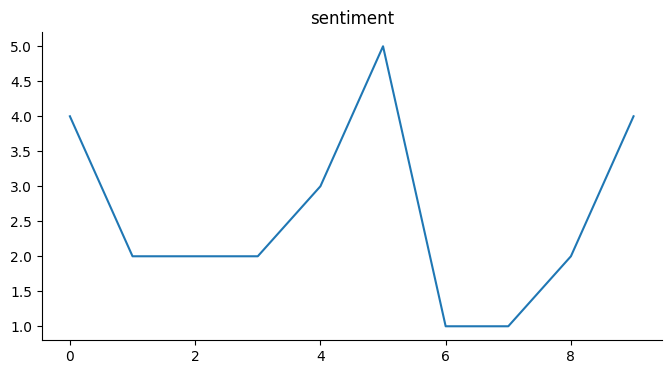

In [ ]:
from matplotlib import pyplot as plt
df['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

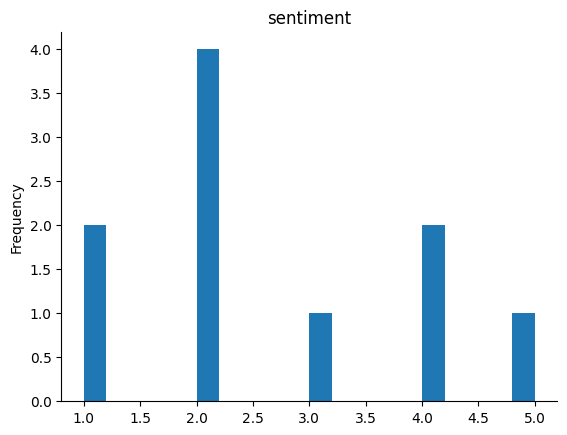

In [ ]:
from matplotlib import pyplot as plt
df['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

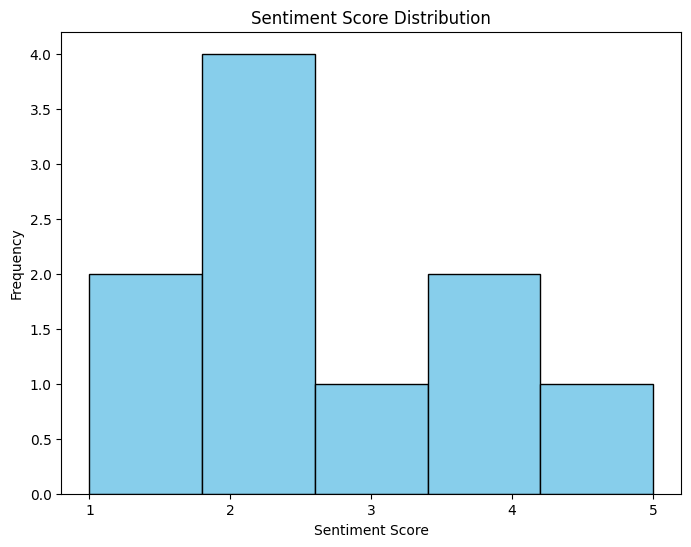

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['sentiment'], bins=5, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.show()


In [ ]:
overall_sentiment = df['sentiment'].mean()
if overall_sentiment >= 4:
    conclusion = "Very good"
elif overall_sentiment >= 3:
    conclusion = "Good"
elif overall_sentiment >= 2:
    conclusion = "Average"
else:
    conclusion = "Bad"

print("Overall Sentiment Score:", overall_sentiment)
print("Conclusion:", conclusion)


Overall Sentiment Score: 2.6
Conclusion: Average
